In [12]:
# import package
import pandas as pd
import numpy as np
import scanpy as sc
import scipy as scipy

In [4]:
# read data: /gladstone/engelhardt/pelka-collaboration/
mtx=pd.read_csv("/gladstone/engelhardt/pelka-collaboration/Broad_MERFISH_Datasets/G4423_20220427/cellpose_cell_by_gene.csv")
mtx=mtx.iloc[:,1:]
mtx


,COL3A1,HLA-E,VIM,JUN,STMN1,ASCL2,TIMP1,HLA-DRB1,DNAJB1,PSMB8,...,Blank-27,Blank-68,UBE2C,Blank-62,SPP1,Blank-17,Blank-40,COL10A1,Blank-9,Blank-59
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546284,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546285,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546286,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546287,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
markers= mtx.columns
markers=markers.tolist()
len(markers)

550

In [9]:
# import spatial info
#meta=pd.read_csv('/wynton/group/gladstone/users/cywu/Broad_MERFISH_Datasets/G4423_20220427/cellpose_cell_metadata.csv')
meta=pd.read_csv('/gladstone/engelhardt/pelka-collaboration/Broad_MERFISH_Datasets/G4423_20220427/cellpose_cell_metadata.csv')
coordinates0=np.array(meta[['center_x', 'center_y']])
coordinates=coordinates0
coordinates
# flip y
coordinates[:,1]=max(coordinates0[:,1])-coordinates0[:,1]


# create anndata

In [13]:
adata = sc.AnnData(mtx, 
    mtx.index.to_frame(), 
    mtx.columns.to_frame())
adata.obsm['spatial']=coordinates

/scratch/chwu/ipykernel_18538/500333676.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(mtx,
/wynton/home/engelhardt/chwu/miniconda3/envs/NSF38/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [14]:
adata_sub=adata#sc.pp.subsample(adata, fraction=0.01, copy=True, random_state=0)
print(adata_sub.shape)
sc.pp.filter_cells(adata_sub, min_genes=1)
print(adata_sub.shape)
print(adata_sub.obsm['spatial'])

(546289, 550)
(489540, 550)
[[11040.23632933  8667.80109592]
 [11058.68008252  8654.00786454]
 [11042.6401072   8650.66599782]
 ...
 [11842.5858035   2830.17602741]
 [11746.48760914  2829.75679688]
 [11733.95617749  2828.74821881]]


In [23]:
tmp=sc.read_h5ad("/wynton/home/engelhardt/chwu/Projects/HubID/neighbor_smooth/Data/G4423_adata_HDP.h5ad")

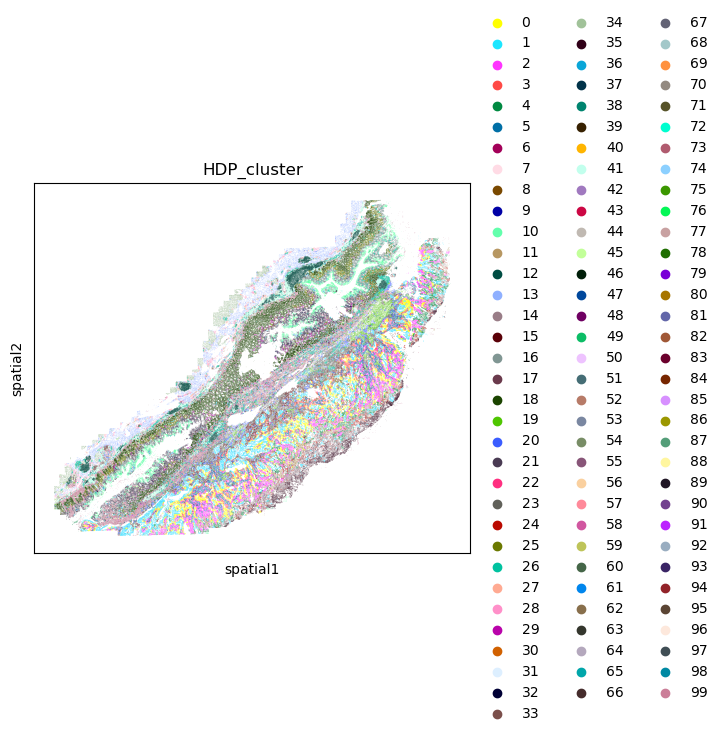

In [17]:
sc.pl.spatial(tmp, spot_size=10, color=['HDP_cluster'])

In [30]:
tmp2=tmp[((tmp.obsm['spatial'][:,0]>4500)& (tmp.obsm['spatial'][:,0]<7000)) & ((tmp.obsm['spatial'][:,1]<max((tmp.obsm['spatial'][:,1]))) & (tmp.obsm['spatial'][:,1]>(max(tmp.obsm['spatial'][:,1])-2500))) ]
                                            
                                            


In [31]:
tmp2.shape

(41122, 550)

/wynton/home/engelhardt/chwu/miniconda3/envs/NSF38/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


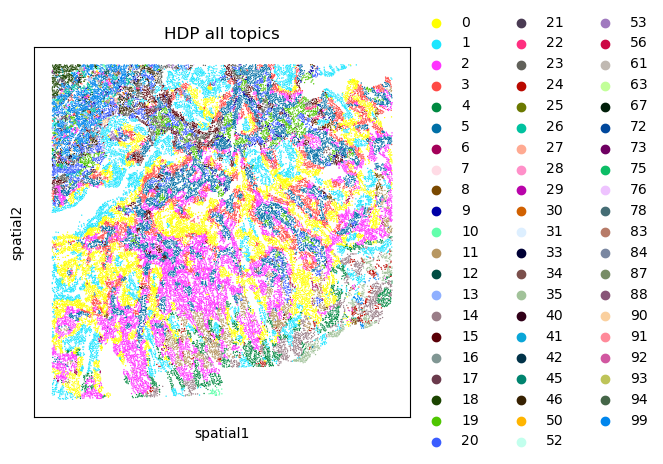

In [32]:
sc.pl.spatial(tmp2, spot_size=10, color=['HDP_cluster'],title="HDP all topics" , show=True)

In [60]:
tmp2=tmp[((tmp.obsm['spatial'][:,0]>5500)& (tmp.obsm['spatial'][:,0]<6500)) & ((tmp.obsm['spatial'][:,1]<max((tmp.obsm['spatial'][:,1]))) & (tmp.obsm['spatial'][:,1]>(max(tmp.obsm['spatial'][:,1])-2500))) ]
                                            
                                            


/wynton/home/engelhardt/chwu/miniconda3/envs/NSF38/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


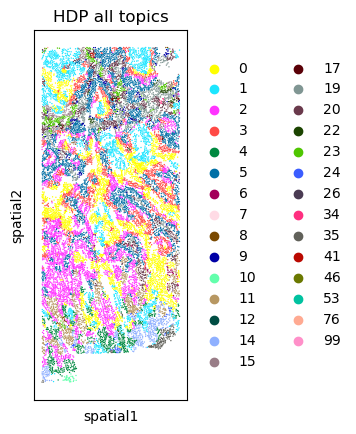

In [61]:
sc.pl.spatial(tmp2, spot_size=10, color=['HDP_cluster'],title="HDP all topics" , show=True)

In [53]:
tmp2=tmp[((tmp.obsm['spatial'][:,0]>6000)& (tmp.obsm['spatial'][:,0]<6500)) & ((tmp.obsm['spatial'][:,1]<max((tmp.obsm['spatial'][:,1])-500)) & (tmp.obsm['spatial'][:,1]>(max(tmp.obsm['spatial'][:,1])-1000))) ]
                                            
                                            


/wynton/home/engelhardt/chwu/miniconda3/envs/NSF38/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


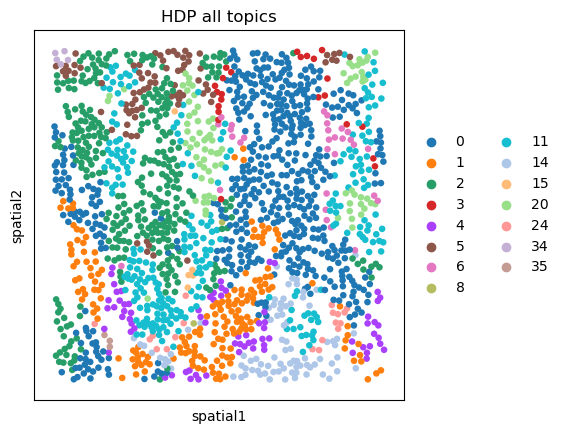

In [54]:
sc.pl.spatial(tmp2, spot_size=10, color=['HDP_cluster'],title="HDP all topics" , show=True)

In [55]:
tmp2.shape

(1700, 550)